# Data analysis of the category "Laptops" using the MPSTATS service and the Wildberries marketplace

# Content page
1. [Import](#import)
2. [Data](#data) <br>
3. [Data Preprocessing :](#data_prep)
                    <br> - 3.1. [Missing values](#missing_values)
                    <br> - 3.2. [Duplicates](#duplicates)
                    <br> - 3.3. [Data types](#data_types)
                    <br> - 3.4. [Columns](#columns)
                    <br> - 3.5. [Outliers](#outliers)<br>
4. [Data analysis:](#data_analysis)
                    <br> - 4.1. [Sales and Revenue analysis](#sales_analysis)
                    <br> - 4.2. [Price and Discount analysis](#price_analysis)
                    <br> - 4.3. [Brand Revenue analysis](#brand_analysis)
                    <br> - 4.4. [Analysis of Producing Countries](#country_analysis)
                    <br> - 4.5. [Sellers Analysis](#seller_analysis)
                    <br> - 4.6. [Rating and Sales Analysis](#rating_analysis)
                    <br> - 4.6. [Reviews and Sales Analysis](#review_analysis)
5. [Logistic Regression](#log_reg)
6. [Sentimental Analysis](#nlp)

<a id='import'></a>
# Import

In [68]:
# data & vizualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import string
from wordcloud import WordCloud

# ML 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split

# Regression
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

<a id='data'></a>
# Dataset

In [22]:
wb = pd.read_csv('laptops.csv', header=1)
wb.head()

,Название,SKU,Продавец,Бренд,Страна,"Выручка, ₽",Средняя дневная выручка,"Продажи, кол-во",Наличие,Оборачиваемость,"Замороженный остаток, %",График количества складов,Базовая цена,Скидка,Цена со скидкой,График изменения цены,Дробный рейтинг,Отзывы,Дней на маркетплейсе,Средняя рекламная ставка
0,MacBook Pro 16/M1 Pro/16/512 (Space Grey),226518722,ООО ВБ Ритейл,Apple,Китай,13710414,457013.800000,98,575,176.02,74.43,"0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",189990,27,137248,"142112,142112,142112,142112,142112,142112,1421...",4.5,41,109,0
1,MacBook Air 13/M1/8/256 (Space Grey),193153888,ООО ВБ Ритейл,Apple,Китай,74283,2476.100000,1,567,17010.00,99.82,"0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",114990,35,74168,"75260,75260,74283,74283,74283,74283,74283,7428...",4.9,179,292,0
2,MacBook Air 13/M1/8/256 (Space Grey),178245376,ООО ВБ Ритейл,Apple,Китай,2633467,87782.233333,37,496,402.16,88.71,"0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",114990,33,76146,"69396,69396,69396,69396,69396,69396,69396,6939...",4.9,179,359,0
3,Ноутбук MagicBook 14 R5 16ГБ+512ГБ 5301AFWF Бе...,254706293,Твой Выбор,Honor,Китай,527651,17588.366667,13,233,412.23,89.27,"0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",59990,34,39143,"0,0,0,0,0,0,0,41231,41231,41231,41231,41231,41...",0.0,0,24,0
4,"V15 G3 ABA 15.6""/FHD/Ryzen 7/8/512/DOS",195327183,ООО ВБ Ритейл,lenovo,Китай,49589,1652.966667,1,191,5730.00,99.48,"0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",72990,30,50801,"50844,50844,50844,50844,50844,50844,50844,5084...",4.8,17,257,0


In [23]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Название                   100 non-null    object 
 1   SKU                        100 non-null    int64  
 2   Продавец                   100 non-null    object 
 3   Бренд                      99 non-null     object 
 4   Страна                     68 non-null     object 
 5   Выручка, ₽                 100 non-null    int64  
 6   Средняя дневная выручка    100 non-null    float64
 7   Продажи, кол-во            100 non-null    int64  
 8   Наличие                    100 non-null    int64  
 9   Оборачиваемость            100 non-null    float64
 10  Замороженный остаток, %    100 non-null    float64
 11  График количества складов  100 non-null    object 
 12  Базовая цена               100 non-null    int64  
 13  Скидка                     100 non-null    int64  


In [24]:
print(wb.describe())

                SKU    Выручка, ₽  Средняя дневная выручка  Продажи, кол-во  \
count  1.000000e+02  1.000000e+02               100.000000       100.000000   
mean   2.149926e+08  9.535549e+05             31785.163667        30.170000   
std    3.833991e+07  2.321189e+06             77372.963849        73.808523   
min    8.440413e+07  0.000000e+00                 0.000000         0.000000   
25%    1.782462e+08  3.154250e+04              1051.416667         1.000000   
50%    2.255149e+08  1.556350e+05              5187.833333         3.000000   
75%    2.478799e+08  5.476055e+05             18253.516667        14.000000   
max    2.619695e+08  1.422724e+07            474241.233333       496.000000   

          Наличие  Оборачиваемость  Замороженный остаток, %  Базовая цена  \
count  100.000000       100.000000               100.000000     100.00000   
mean    82.480000       600.157600                67.326300   78143.23000   
std     91.004216      1911.214462                38.0621

<a id='data_prep'></a>
# Data Preprocessing:
                                    1. Missing values
                                    2. Duplicates
                                    3. Data types
                                    4. Columns
                                    5. Outliers 

<a id='missing_values'></a>

In [25]:
# Missing values
wb.isnull().sum()

Название                      0
SKU                           0
Продавец                      0
Бренд                         1
Страна                       32
Выручка, ₽                    0
Средняя дневная выручка       0
Продажи, кол-во               0
Наличие                       0
Оборачиваемость               0
Замороженный остаток, %       0
График количества складов     0
Базовая цена                  0
Скидка                        0
Цена со скидкой               0
График изменения цены         0
Дробный рейтинг               0
Отзывы                        0
Дней на маркетплейсе          0
Средняя рекламная ставка      0
dtype: int64

In [26]:
wb.dropna(subset=['Бренд', 'Страна'], inplace=True)
print(f"Number of null values after preprocessing: {wb.isnull().sum().sum()}")
print(f"Shape after preprocessing: {wb.shape}")

Number of null values after preprocessing: 0
Shape after preprocessing: (67, 20)


<a id='duplicates'></a>

In [27]:
# Duplicates
duplicates = wb.duplicated().sum()

if duplicates > 0:
    wb = wb.drop_duplicates()

print(f'Number of the same rows (duplicates): {duplicates}')
print(f'Shape of the dataset after removing duplicates: {wb.shape}')

Number of the same rows (duplicates): 0
Shape of the dataset after removing duplicates: (67, 20)


<a id='data_types'></a>

In [28]:
#dtype
print(wb.dtypes)
wb['Выручка, ₽'] = wb['Выручка, ₽'].astype(float)

Название                      object
SKU                            int64
Продавец                      object
Бренд                         object
Страна                        object
Выручка, ₽                     int64
Средняя дневная выручка      float64
Продажи, кол-во                int64
Наличие                        int64
Оборачиваемость              float64
Замороженный остаток, %      float64
График количества складов     object
Базовая цена                   int64
Скидка                         int64
Цена со скидкой                int64
График изменения цены         object
Дробный рейтинг              float64
Отзывы                         int64
Дней на маркетплейсе           int64
Средняя рекламная ставка       int64
dtype: object


<a id='columns'></a>

In [29]:
#Columns
wb.drop(columns=['График количества складов', 'График изменения цены'], inplace=True)

In [30]:
wb.head()

,Название,SKU,Продавец,Бренд,Страна,"Выручка, ₽",Средняя дневная выручка,"Продажи, кол-во",Наличие,Оборачиваемость,"Замороженный остаток, %",Базовая цена,Скидка,Цена со скидкой,Дробный рейтинг,Отзывы,Дней на маркетплейсе,Средняя рекламная ставка
0,MacBook Pro 16/M1 Pro/16/512 (Space Grey),226518722,ООО ВБ Ритейл,Apple,Китай,13710414.0,457013.800000,98,575,176.02,74.43,189990,27,137248,4.5,41,109,0
1,MacBook Air 13/M1/8/256 (Space Grey),193153888,ООО ВБ Ритейл,Apple,Китай,74283.0,2476.100000,1,567,17010.00,99.82,114990,35,74168,4.9,179,292,0
2,MacBook Air 13/M1/8/256 (Space Grey),178245376,ООО ВБ Ритейл,Apple,Китай,2633467.0,87782.233333,37,496,402.16,88.71,114990,33,76146,4.9,179,359,0
3,Ноутбук MagicBook 14 R5 16ГБ+512ГБ 5301AFWF Бе...,254706293,Твой Выбор,Honor,Китай,527651.0,17588.366667,13,233,412.23,89.27,59990,34,39143,0.0,0,24,0
4,"V15 G3 ABA 15.6""/FHD/Ryzen 7/8/512/DOS",195327183,ООО ВБ Ритейл,lenovo,Китай,49589.0,1652.966667,1,191,5730.00,99.48,72990,30,50801,4.8,17,257,0


In [31]:
wb.shape

(67, 18)

<a id='outliers'></a>

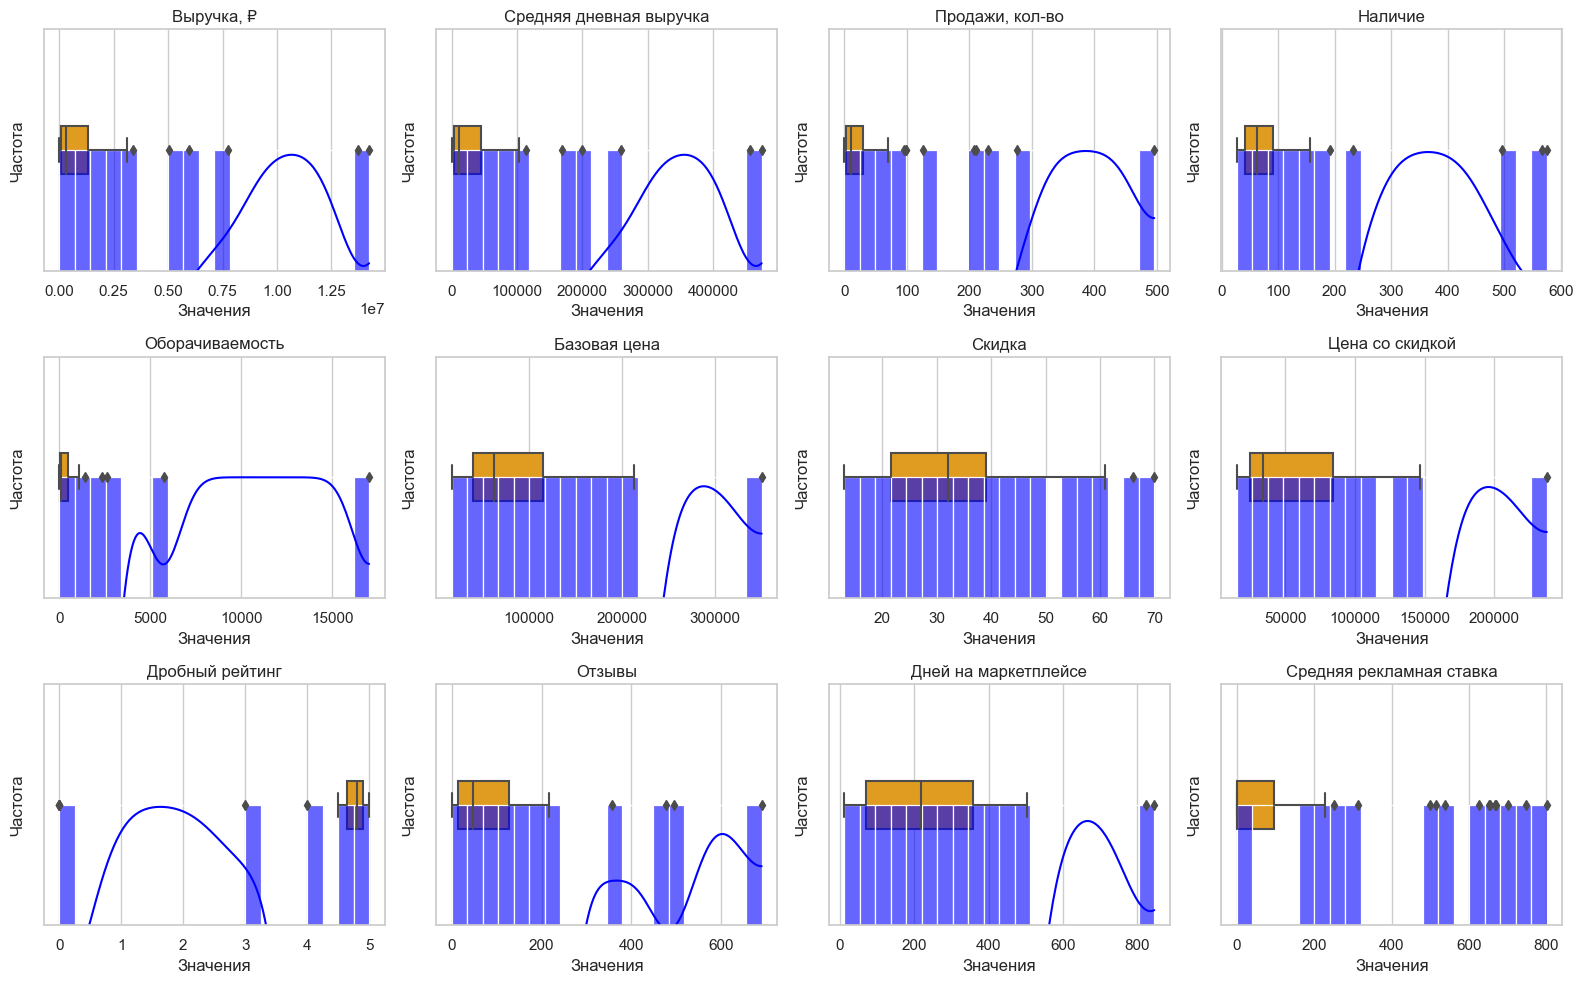

In [32]:
#Outliers
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

exclude_columns = ['SKU', 'Замороженный остаток, %']

numeric_columns = wb.select_dtypes(include=['float64', 'int64']).columns
filtered_columns = [col for col in numeric_columns if col not in exclude_columns]

n_cols = 4
n_rows = (len(filtered_columns) + n_cols - 1) // n_cols  # округляем вверх

for i, col in enumerate(filtered_columns, start=1):
    plt.subplot(n_rows, n_cols, i)  # создаем сетку
    sns.histplot(wb[col], bins=20, kde=True, color='blue', alpha=0.6)  # Гистограмма с плотностью
    sns.boxplot(x=wb[col], color='orange', width=0.2)  # Коробчатый график
    plt.title(col)
    plt.xlabel('Значения')
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

*ОБЪЯСНЕНИЕ ГРАФИКОВ*

<a id='data_analysis'></a>
After the data is fully processed, the analysis begins

<a id='sales_analysis'></a>
# Sales and Revenue Analysis

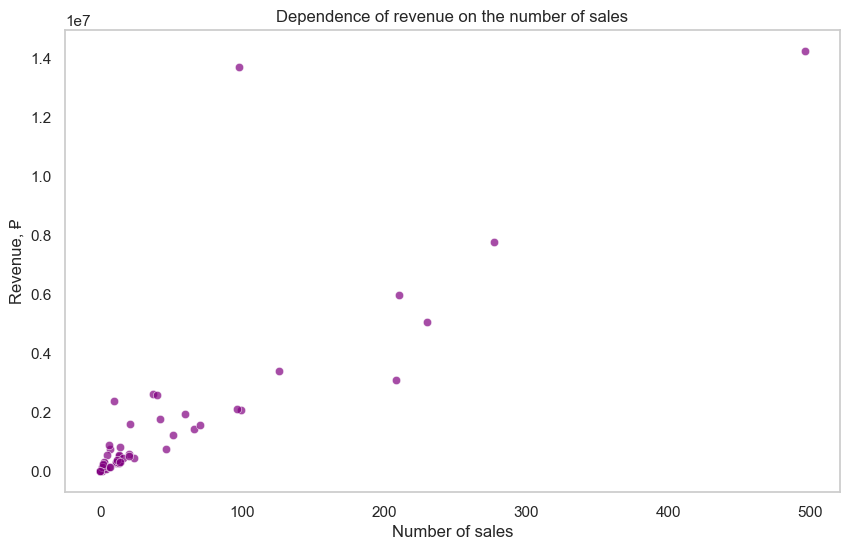

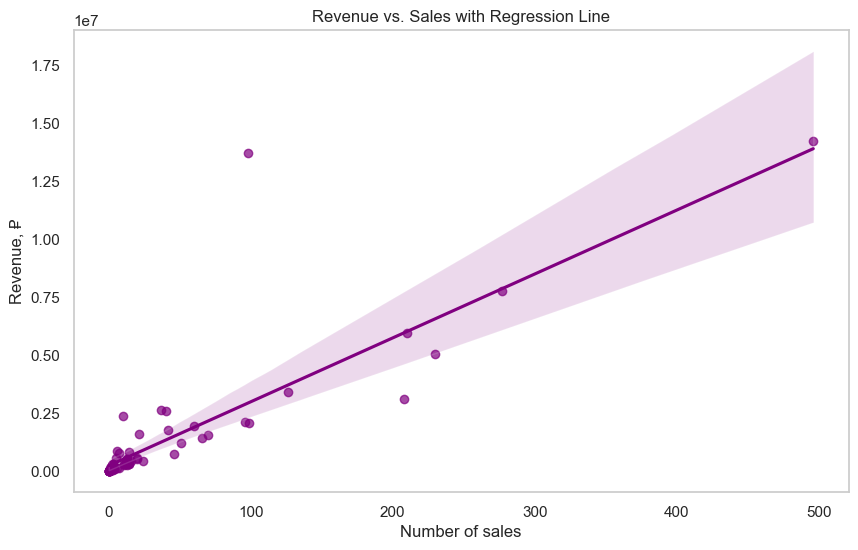

Correlation between sales volume and revenue:
                 Продажи, кол-во  Выручка, ₽
Продажи, кол-во          1.00000     0.83776
Выручка, ₽               0.83776     1.00000


In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=wb, x='Продажи, кол-во', y='Выручка, ₽', color='purple', alpha=0.7)
plt.title('Dependence of revenue on the number of sales')
plt.xlabel('Number of sales')
plt.ylabel('Revenue, ₽')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=wb, x='Продажи, кол-во', y='Выручка, ₽', color='purple', marker='o', scatter_kws={'alpha':0.7})
plt.title('Revenue vs. Sales with Regression Line')
plt.xlabel('Number of sales')
plt.ylabel('Revenue, ₽')
plt.grid()
plt.show()

correlation = wb[['Продажи, кол-во', 'Выручка, ₽']].corr()
print('Correlation between sales volume and revenue:')
print(correlation)

<a id='price_analysis'></a>
# Price and Discount analysis

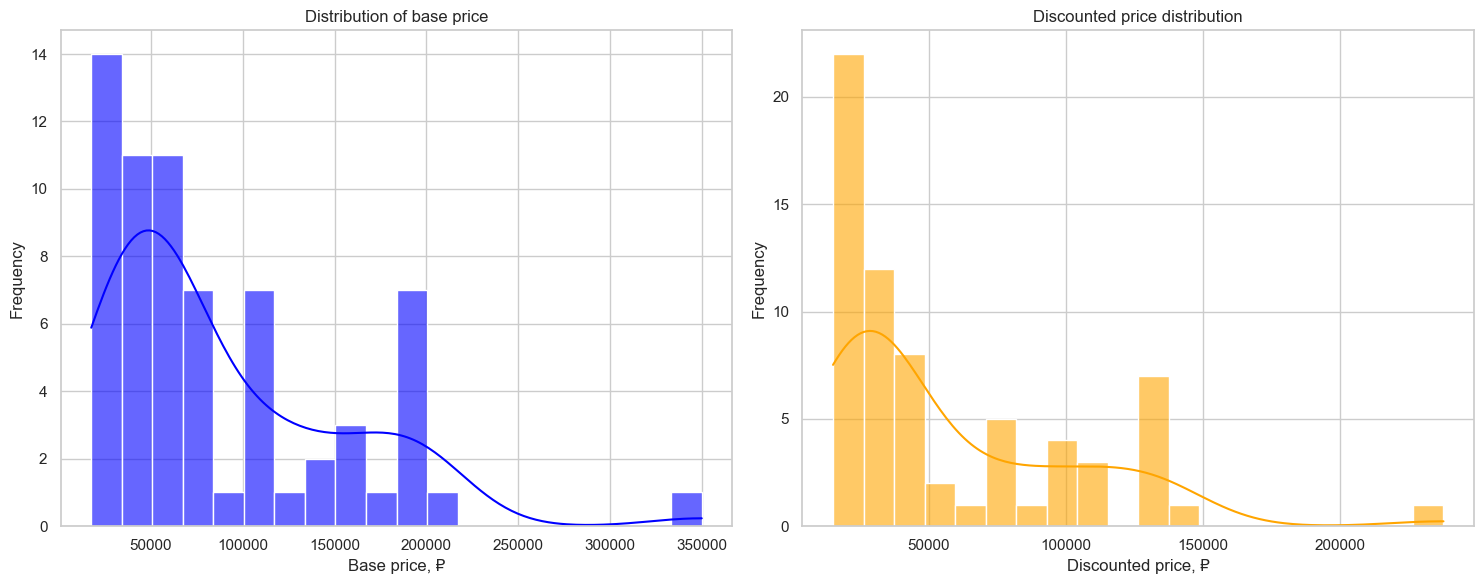

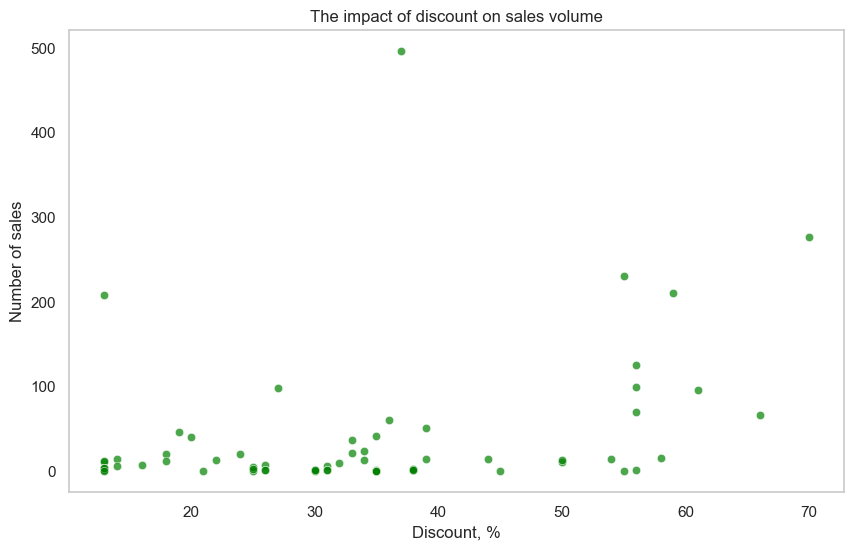

In [34]:
plt.figure(figsize=(15, 6))

# basic
plt.subplot(1, 2, 1)
sns.histplot(wb['Базовая цена'], bins=20, kde=True, color='blue', alpha=0.6)
plt.title('Distribution of base price')
plt.xlabel('Base price, ₽')
plt.ylabel('Frequency')

# discount
plt.subplot(1, 2, 2)
sns.histplot(wb['Цена со скидкой'], bins=20, kde=True, color='orange', alpha=0.6)
plt.title('Discounted price distribution')
plt.xlabel('Discounted price, ₽')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=wb, x='Скидка', y='Продажи, кол-во', color='green', alpha=0.7)
plt.title('The impact of discount on sales volume')
plt.xlabel('Discount, %')
plt.ylabel('Number of sales')
plt.grid()
plt.show()

<a id='brand_analysis'></a>
# Brand Revenue analysis

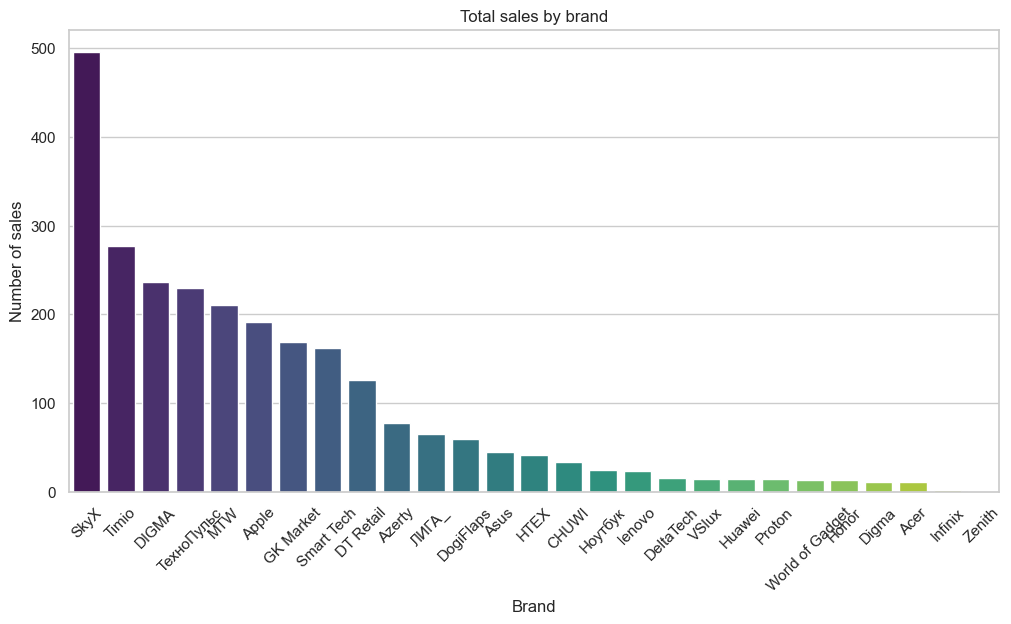

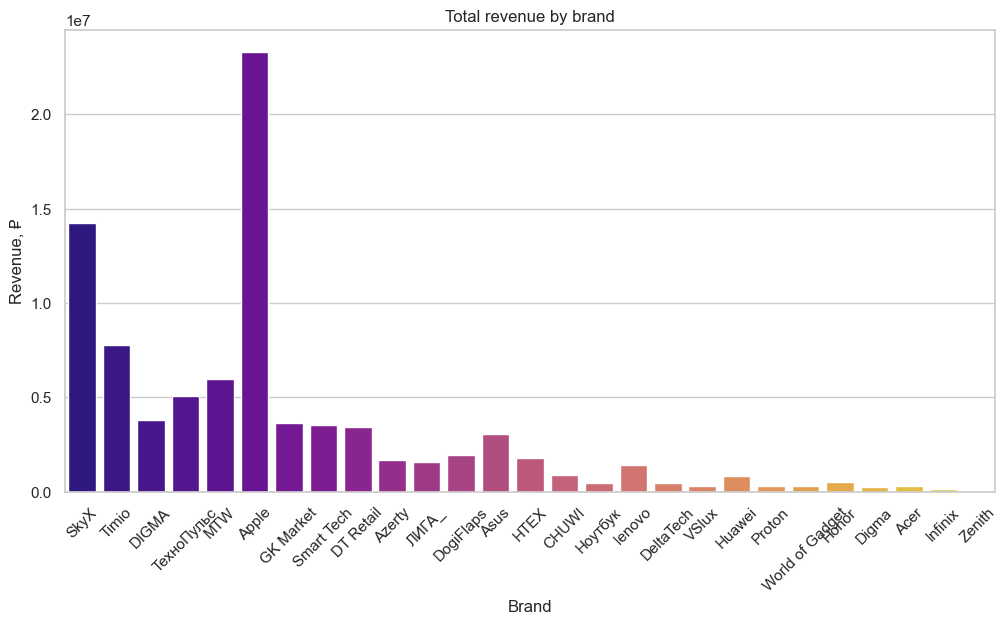

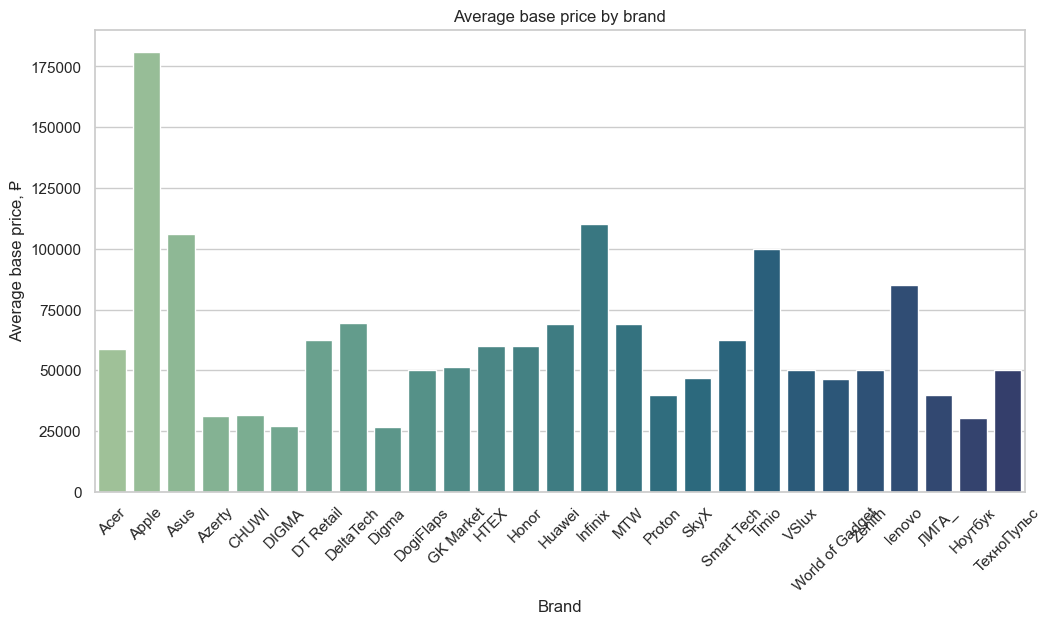

In [35]:
brand_analysis = wb.groupby('Бренд').agg({'Продажи, кол-во': 'sum', 'Выручка, ₽': 'sum'}).reset_index()

brand_analysis = brand_analysis[(brand_analysis['Продажи, кол-во'] > 0) & (brand_analysis['Выручка, ₽'] > 0)]

brand_analysis = brand_analysis.sort_values(by='Продажи, кол-во', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=brand_analysis, x='Бренд', y='Продажи, кол-во', palette='viridis')
plt.title('Total sales by brand')
plt.xlabel('Brand')
plt.ylabel('Number of sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=brand_analysis, x='Бренд', y='Выручка, ₽', palette='plasma')
plt.title('Total revenue by brand')
plt.xlabel('Brand')
plt.ylabel('Revenue, ₽')
plt.xticks(rotation=45)
plt.show()

avg_price_discount = wb.groupby('Бренд').agg({'Базовая цена': 'mean', 'Скидка': 'mean'}).reset_index()
avg_price_discount = avg_price_discount[(avg_price_discount['Бренд'].isin(brand_analysis['Бренд']))]

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_discount, x='Бренд', y='Базовая цена', palette='crest')
plt.title('Average base price by brand')
plt.xlabel('Brand')
plt.ylabel('Average base price, ₽')
plt.xticks(rotation=45)
plt.show()

<a id='country_analysis'></a>
# Analysis of Producing Countries (China, Germany, Russia)

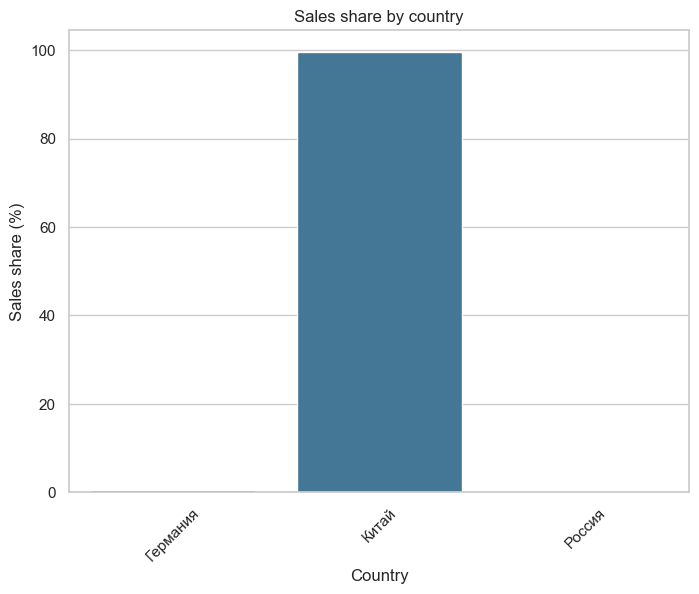

In [36]:
country_analysis = wb.groupby('Страна').agg({'Продажи, кол-во': 'sum', 'Выручка, ₽': 'sum'}).reset_index()

total_sales = country_analysis['Продажи, кол-во'].sum()
total_revenue = country_analysis['Выручка, ₽'].sum()

country_analysis['Доля продаж'] = country_analysis['Продажи, кол-во'] / total_sales * 100
country_analysis['Доля выручки'] = country_analysis['Выручка, ₽'] / total_revenue * 100

avg_price_discount = wb.groupby('Страна').agg({'Базовая цена': 'mean', 'Скидка': 'mean'}).reset_index()

country_analysis = country_analysis.merge(avg_price_discount, on='Страна', how='left')

plt.figure(figsize=(8, 6))
sns.barplot(data=country_analysis, x='Страна', y='Доля продаж', palette='mako')
plt.title('Sales share by country')
plt.xlabel('Country')
plt.ylabel('Sales share (%)')
plt.xticks(rotation=45)
plt.show()

<a id='seller_analysis'></a>
# Sellers Analysis

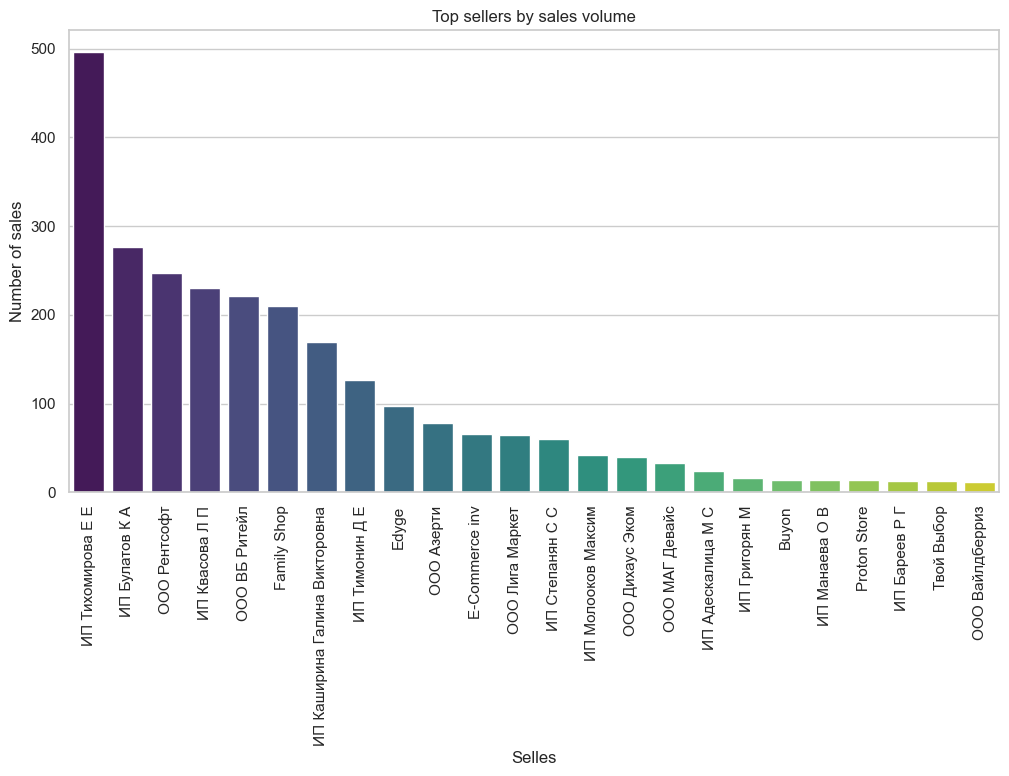

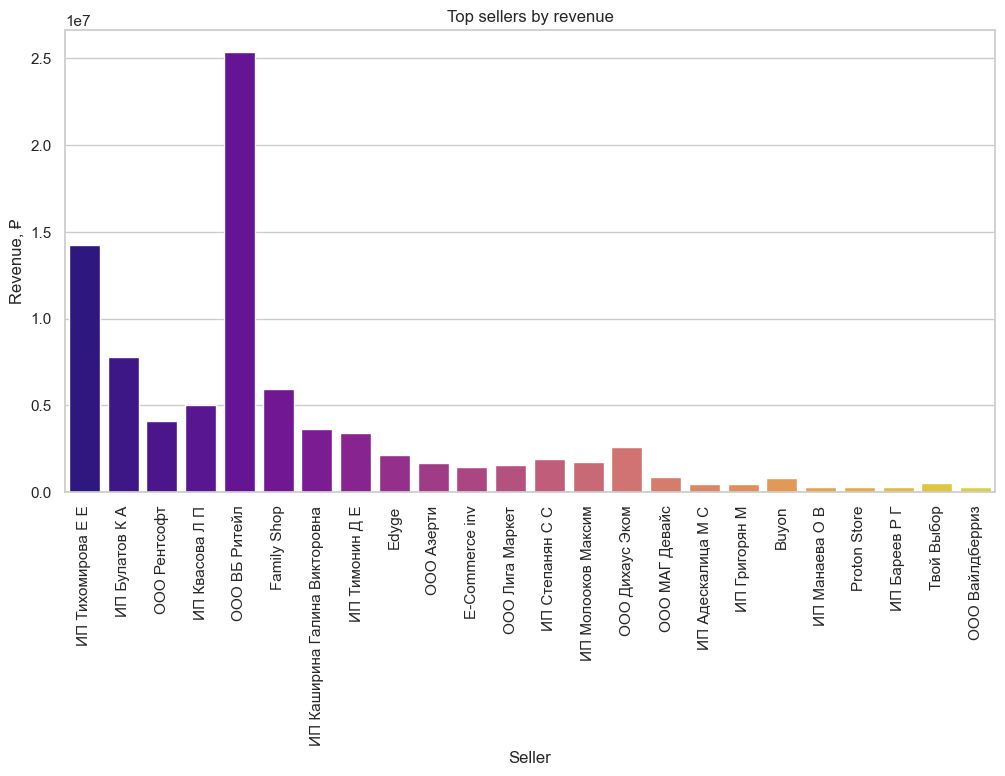

In [37]:
seller_analysis = wb.groupby('Продавец').agg({'Продажи, кол-во': 'sum', 'Выручка, ₽': 'sum'}).reset_index()

seller_analysis = seller_analysis[(seller_analysis['Продажи, кол-во'] > 0) & (seller_analysis['Выручка, ₽'] > 0)]

seller_analysis = seller_analysis.sort_values(by='Продажи, кол-во', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=seller_analysis, x='Продавец', y='Продажи, кол-во', palette='viridis')
plt.title('Top sellers by sales volume')
plt.xlabel('Selles')
plt.ylabel('Number of sales')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=seller_analysis, x='Продавец', y='Выручка, ₽', palette='plasma')
plt.title('Top sellers by revenuе')
plt.xlabel('Seller')
plt.ylabel('Revenue, ₽')
plt.xticks(rotation=90)
plt.show()

<a id='rating_analysis'></a>
# Rating and Sales Analysis

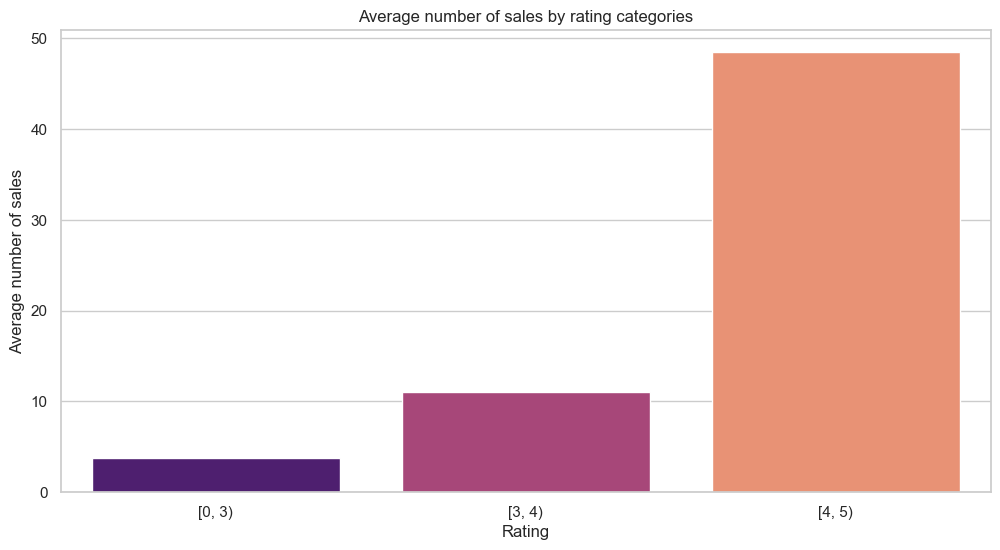

In [38]:
sns.set(style="whitegrid")

rating_analysis = wb.groupby(pd.cut(wb['Дробный рейтинг'], bins=[0, 3, 4, 5], right=False)).agg({'Продажи, кол-во': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=rating_analysis, x='Дробный рейтинг', y='Продажи, кол-во', palette='magma')
plt.title('Average number of sales by rating categories')
plt.xlabel('Rating')
plt.ylabel('Average number of sales')
plt.xticks(rotation=0)
plt.show()

<a id='review_analysis'></a>
# Reviews and Sales Analysis

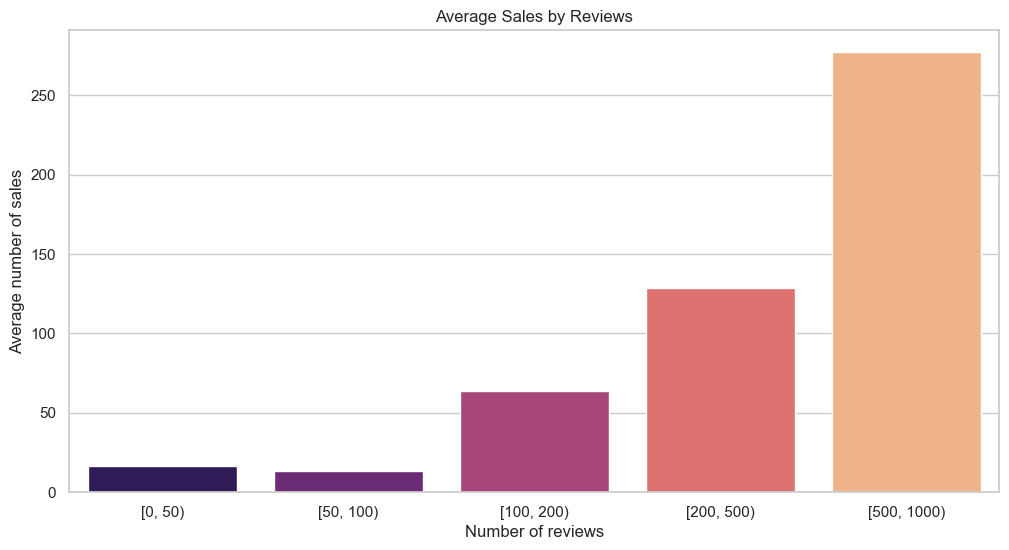

In [39]:
sns.set(style="whitegrid")

review_analysis = wb.groupby(pd.cut(wb['Отзывы'], bins=[0, 50, 100, 200, 500, 1000], right=False)).agg({'Продажи, кол-во': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=review_analysis, x='Отзывы', y='Продажи, кол-во', palette='magma')
plt.title('Average Sales by Reviews')
plt.xlabel('Number of reviews')
plt.ylabel('Average number of sales')
plt.xticks(rotation=0)
plt.show()

<a id='log_reg'></a>
# Logistic Regression

In [43]:
average_revenue = wb['Выручка, ₽'].mean()
wb['Успех'] = (wb['Выручка, ₽'] > average_revenue).astype(int)

X = wb[['Наличие', 'Скидка', 'Отзывы', 'Средняя рекламная ставка', 'Средняя дневная выручка']]
y = wb['Успех']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

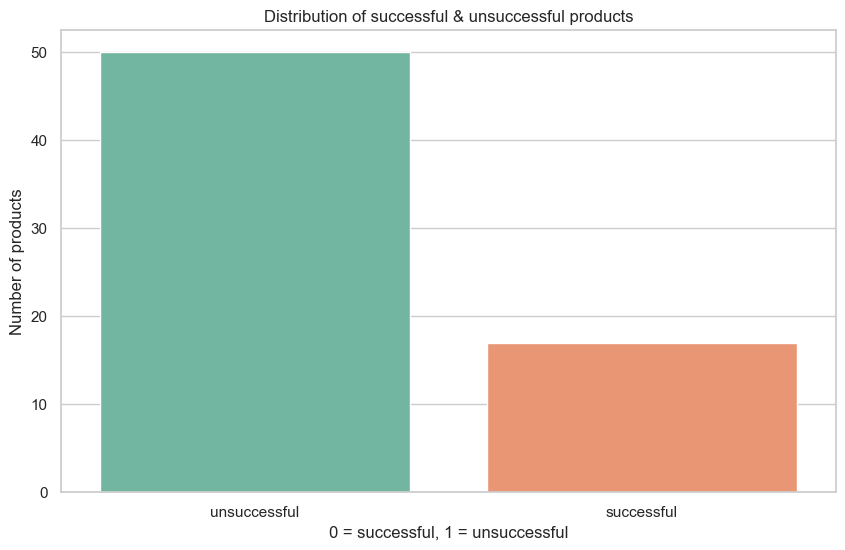

Accuracy: 0.9285714285714286
[[12  0]
 [ 1  1]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.50      0.67         2

    accuracy                           0.93        14
   macro avg       0.96      0.75      0.81        14
weighted avg       0.93      0.93      0.92        14



In [44]:
# Success
plt.figure(figsize=(10, 6))
sns.countplot(data=wb, x='Успех', palette='Set2')
plt.title('Distribution of successful & unsuccessful products')
plt.xlabel('0 = successful, 1 = unsuccessful')
plt.ylabel('Number of products')
plt.xticks(ticks=[0, 1], labels=['unsuccessful', 'successful'])
plt.show()

# Results
print(f'Accuracy: {accuracy}')
print(conf_matrix)
print(class_report)

<a id='nlp'></a>
# Sentimental analysis

In [45]:
NLP_dataset = pd.read_excel('Анализ отзывов.xlsx')
NLP_dataset.head(20)

,status,text
0,0,"Здравствуйте! Как получить чек на этот товар, ..."
1,1,"Всё в порядке, пришёл не вскрытый, не активиро..."
2,1,"пока работает, непривязанная к компании версия..."
3,1,"Всё пришло в короткий срок, упаковка заводская..."
4,1,Приехал целый
5,1,Все отлично
6,0,Без гарантии
7,1,Всё отлично. Очень переживала конечно. Сумма н...
8,1,"быстрая доставка, оригинальный"
9,1,"Ребят, это макбук, что тут ещё сказать? Батаре..."


In [46]:
NLP_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   status  99 non-null     int64 
 1   text    99 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [47]:
NLP_dataset.describe()

,status
count,99.000000
mean,0.656566
std,0.477272
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [48]:
NLP_dataset ['text']

0     Здравствуйте! Как получить чек на этот товар, ...
1     Всё в порядке, пришёл не вскрытый, не активиро...
2     пока работает, непривязанная к компании версия...
3     Всё пришло в короткий срок, упаковка заводская...
4                                         Приехал целый
                            ...                        
94    Купил несколько месяцев назад. Очень доволен. ...
95                  Пришел целый, работает всё отлично!
96    Купили ноутбук для учебы ребенку, товар соотве...
97    Пришла в срок,ноут хорош работает нормально ,в...
98    Топ за свои деньги, уже использую 4 месяца и н...
Name: text, Length: 99, dtype: object

# Length column

In [49]:
NLP_dataset['length'] = NLP_dataset['text'].apply(len)
NLP_dataset.head(20)

,status,text,length
0,0,"Здравствуйте! Как получить чек на этот товар, ...",178
1,1,"Всё в порядке, пришёл не вскрытый, не активиро...",52
2,1,"пока работает, непривязанная к компании версия...",636
3,1,"Всё пришло в короткий срок, упаковка заводская...",76
4,1,Приехал целый,13
5,1,Все отлично,11
6,0,Без гарантии,12
7,1,Всё отлично. Очень переживала конечно. Сумма н...,121
8,1,"быстрая доставка, оригинальный",30
9,1,"Ребят, это макбук, что тут ещё сказать? Батаре...",1560


In [50]:
NLP_dataset.describe()

,status,length
count,99.000000,99.000000
mean,0.656566,96.424242
std,0.477272,193.356185
min,0.000000,6.000000
25%,0.000000,20.500000
50%,1.000000,31.000000
75%,1.000000,101.500000
max,1.000000,1560.000000


In [51]:
positive = NLP_dataset[NLP_dataset['status']==1]
negative = NLP_dataset[NLP_dataset['status']==0]

In [52]:
positive.describe()

,status,length
count,65.0,65.000000
mean,1.0,98.769231
std,0.0,210.252138
min,1.0,6.000000
25%,1.0,20.000000
50%,1.0,40.000000
75%,1.0,99.000000
max,1.0,1560.000000


In [53]:
negative.describe()

,status,length
count,34.0,34.000000
mean,0.0,91.941176
std,0.0,158.942136
min,0.0,11.000000
25%,0.0,21.250000
50%,0.0,26.500000
75%,0.0,109.750000
max,0.0,846.000000


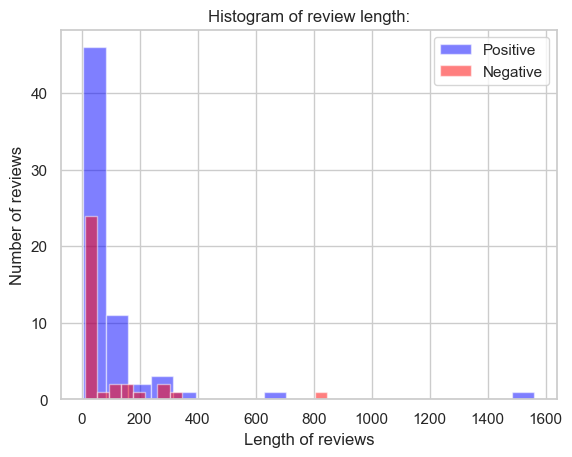

In [54]:
plt.hist(positive['length'], bins=20, color='blue', alpha=0.5, label='Positive')
plt.hist(negative['length'], bins=20, color='red', alpha=0.5, label='Negative')

plt.xlabel('Length of reviews')
plt.ylabel('Number of reviews')
plt.title('Histogram of review length:')
plt.legend(loc='upper right')
plt.show()

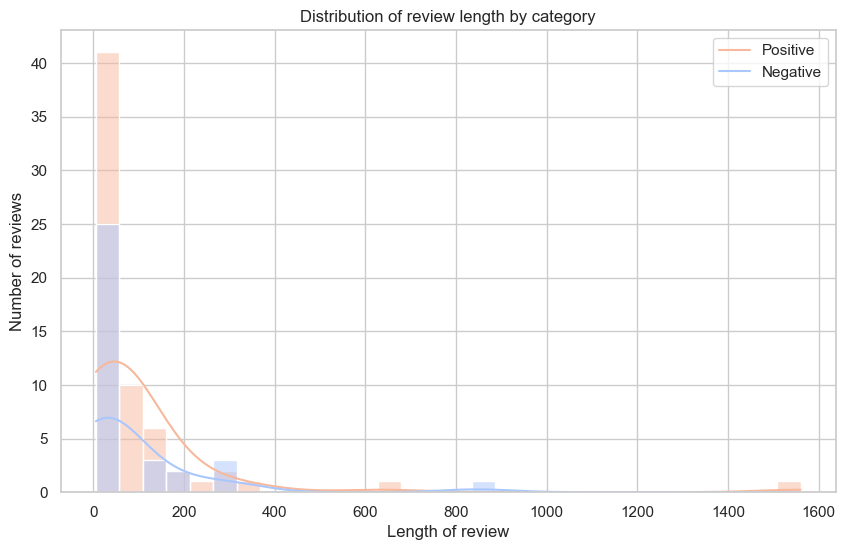

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=NLP_dataset, x='length', hue='status', bins=30, kde=True, palette='coolwarm')
plt.title('Distribution of review length by category')
plt.xlabel('Length of review')
plt.ylabel('Number of reviews')
plt.legend(labels=['Positive', 'Negative'])
plt.show()

# Text Filtration

In [56]:
NLP_dataset['text'] = NLP_dataset['text'].apply(lambda x: x.lower())
NLP_dataset.head()

,status,text,length
0,0,"здравствуйте! как получить чек на этот товар, ...",178
1,1,"всё в порядке, пришёл не вскрытый, не активиро...",52
2,1,"пока работает, непривязанная к компании версия...",636
3,1,"всё пришло в короткий срок, упаковка заводская...",76
4,1,приехал целый,13


In [57]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
NLP_dataset['text'] = NLP_dataset['text'].apply(lambda x: x.translate(remove_punct_dict))
NLP_dataset.head()

,status,text,length
0,0,здравствуйте как получить чек на этот товар по...,178
1,1,всё в порядке пришёл не вскрытый не активирова...,52
2,1,пока работает непривязанная к компании версия ...,636
3,1,всё пришло в короткий срок упаковка заводская ...,76
4,1,приехал целый,13


In [58]:
nltk.download('stopwords')

stop_words_en = set(stopwords.words('english'))
stop_words_ru = set(stopwords.words('russian'))
stop_words_kk = set(stopwords.words('kazakh'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words_en and 
                                                  word.lower() not in stop_words_ru and
                                                  word.lower() not in stop_words_kk]
    return ' '.join(filtered_words)

NLP_dataset['text'] = NLP_dataset['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
NLP_dataset.head()

,status,text,length
0,0,здравствуйте получить чек товар подтверждающий...,178
1,1,всё порядке пришёл вскрытый активированный,52
2,1,пока работает непривязанная компании версия чи...,636
3,1,всё пришло короткий срок упаковка заводская пр...,76
4,1,приехал целый,13


In [60]:
filtered_text = NLP_dataset['text'].tolist()
print(filtered_text)

['здравствуйте получить чек товар подтверждающий купил makbook 16 чтото другое второй вопрос почему отсутствует серийный номер нижней панели mak', 'всё порядке пришёл вскрытый активированный', 'пока работает непривязанная компании версия чистой переустановки ок вылезло откудато скол краски кнопке т видео распаковки прилагаю пунтке выдачи такую мелочь заметить ожидаешь такого открытого устройства гарантия сайте эпл горячей линии продлевается дату покупки подтвреждают хотя чек приложил соответственно гарантии никакой тк продавец точно решать сталкивался браками маркетплейсах знают ситуация другого покупателя бп отзывах тому подтверждение целом работает спасибо многих 14 удобнее', 'всё пришло короткий срок упаковка заводская произведён осенью 2021 года', 'приехал целый', 'отлично', 'гарантии', 'всё отлично очень переживала сумма маленькая урвала очень приятной скидке общем берите всё отлично', 'быстрая доставка оригинальный', 'ребят это макбук ещё сказать батарея топ 14 часов просмотра ки

In [61]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # эмодзи смайликов
                               u"\U0001F300-\U0001F5FF"  # символы и пиктограммы
                               u"\U0001F680-\U0001F6FF"  # символы транспорта и карты
                               u"\U0001F1E0-\U0001F1FF"  # флаги (iOS)
                               "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)
NLP_dataset['text'] = NLP_dataset['text'].apply(remove_emoji)

# Updated

In [62]:
NLP_dataset.head(20)

,status,text,length
0,0,здравствуйте получить чек товар подтверждающий...,178
1,1,всё порядке пришёл вскрытый активированный,52
2,1,пока работает непривязанная компании версия чи...,636
3,1,всё пришло короткий срок упаковка заводская пр...,76
4,1,приехал целый,13
5,1,отлично,11
6,0,гарантии,12
7,1,всё отлично очень переживала сумма маленькая у...,121
8,1,быстрая доставка оригинальный,30
9,1,ребят это макбук ещё сказать батарея топ 14 ча...,1560


# Word Cloud 

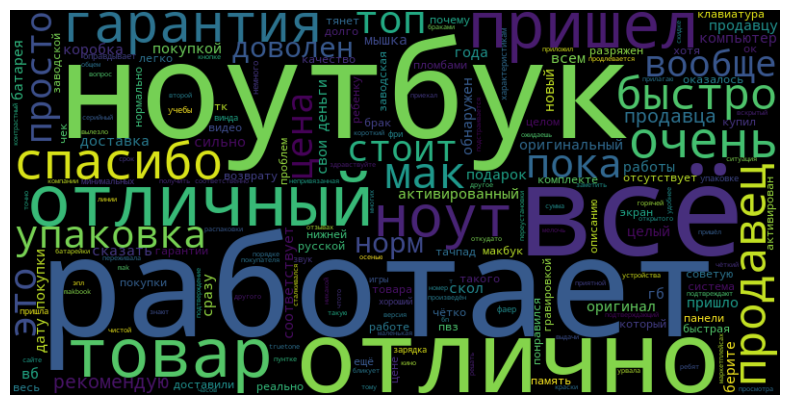

In [63]:
all_text = ' '.join(NLP_dataset['text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# for Positive Reviews:

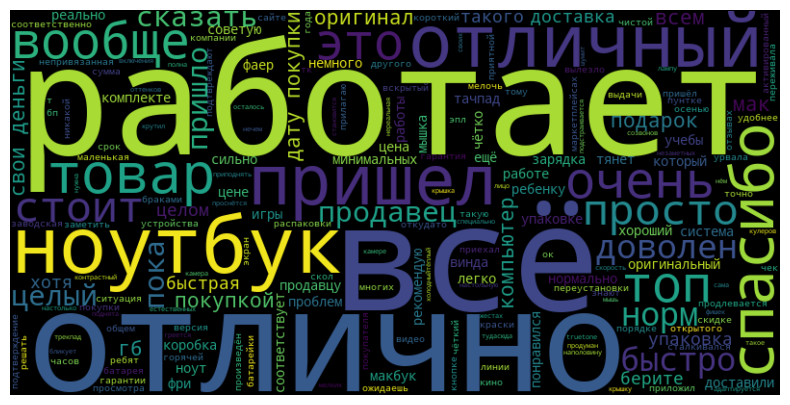

In [64]:
positive_reviews = NLP_dataset[NLP_dataset['status'] == 1]['text']
positive_text = ' '.join(positive_reviews)
wordcloud_positive = WordCloud(width=800, height=400, background_color='black').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
wordcloud = WordCloud()
wordcloud.generate(positive_text)
positive_word_list = list(wordcloud.words_.keys())
print("Позитивные слова:")
print(positive_word_list[:25])

Позитивные слова:
['работает', 'всё', 'отлично', 'ноутбук', 'отличный', 'пришел', 'спасибо', 'товар', 'очень', 'это', 'топ', 'вообще', 'просто', 'стоит', 'доволен', 'быстро', 'норм', 'пока', 'продавец', 'пришло', 'целый', 'сказать', 'покупкой', 'всем', 'оригинал']


# for Negative Reviews:

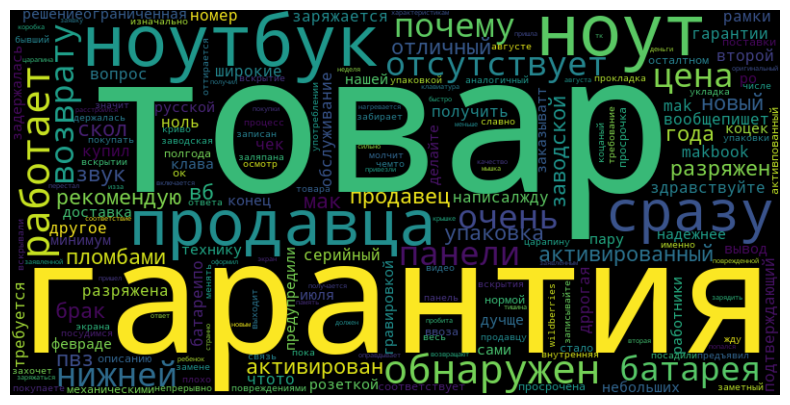

In [66]:
negative_reviews = NLP_dataset[NLP_dataset['status'] == 0]['text']
negative_text = ' '.join(negative_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()

In [67]:
wordcloud = WordCloud()
wordcloud.generate(negative_text)
negative_word_list = list(wordcloud.words_.keys())

print("\nОтрицательные слова:")
print(negative_word_list[:25])


Отрицательные слова:
['товар', 'гарантия', 'ноутбук', 'ноут', 'продавца', 'сразу', 'обнаружен', 'работает', 'почему', 'отсутствует', 'нижней', 'панели', 'цена', 'очень', 'батарея', 'возврату', 'активированный', 'года', 'вб', 'новый', 'скол', 'разряжен', 'активирован', 'упаковка', 'пломбами']
